### Day 6 - ARIMA Forecast Model 

In [2]:
from pandas import read_csv
from datetime import datetime
from matplotlib import pyplot

In [3]:
def parser(x):
    return datetime.strptime('190' + x, '%Y-%m')

series = read_csv('shampoo.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
series.head()

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales, dtype: float64

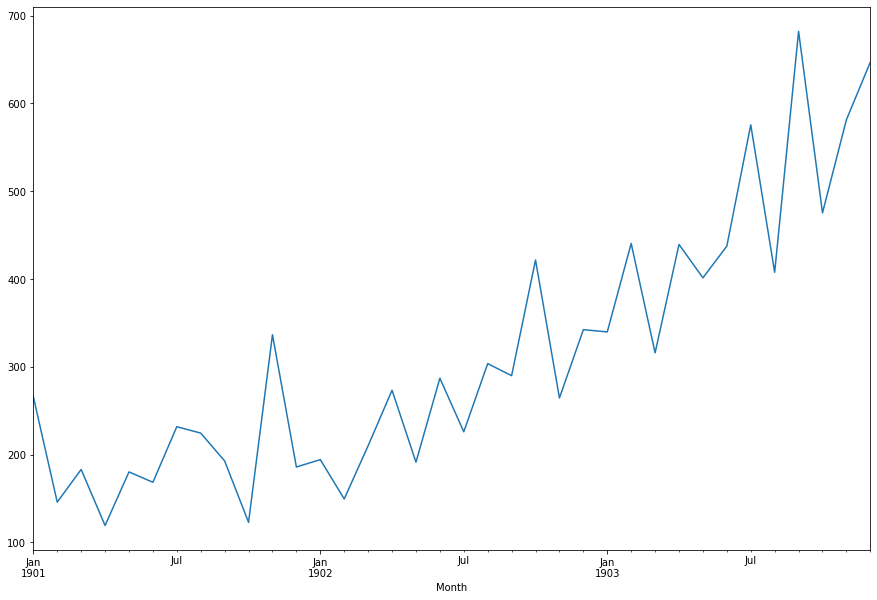

In [5]:
pyplot.figure(figsize=(15, 10))
series.plot()
pyplot.show()

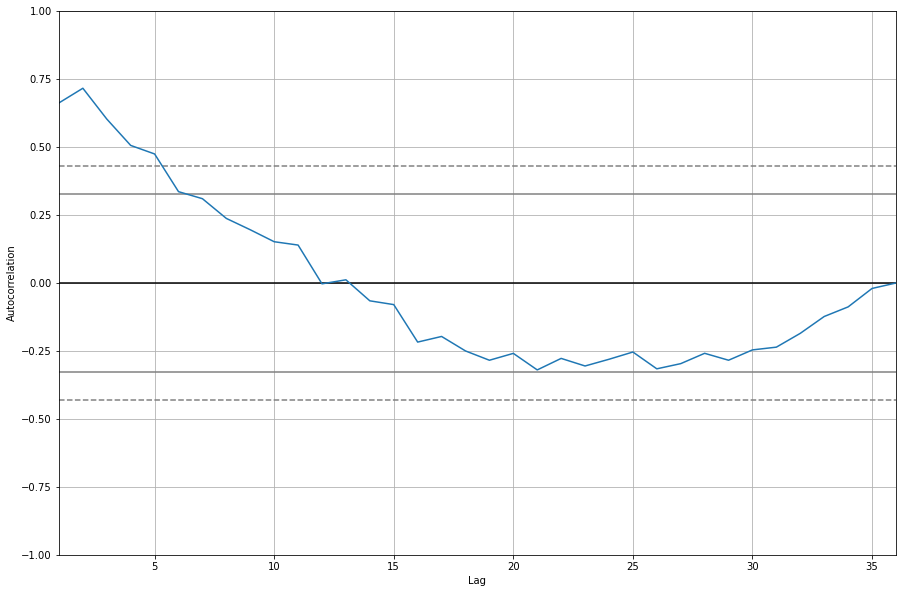

In [6]:
from pandas.plotting import autocorrelation_plot

pyplot.figure(figsize=(15, 10))
autocorrelation_plot(series)
pyplot.show()

### ARIMA with Python

In [13]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(series, order=(5, 1, 5))
model_fit = model.fit()

model_fit.summary()

C:\Users\Tong\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Tong\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Tong\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Tong\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Tong\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likeli

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(5, 1, 5)   Log Likelihood                -191.533
Date:                Thu, 24 Nov 2022   AIC                            405.066
Time:                        17:35:43   BIC                            422.175
Sample:                    01-01-1901   HQIC                           410.972
                         - 12-01-1903                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1364      0.354     -0.386      0.700      -0.830       0.557
ar.L2          0.3990      0.325      1.228      0.220      -0.238       1.036
ar.L3         -0.3749      0.281     -1.334      0.182      -0.926       0.176
ar.L4          0.3687      0.211      1.750      0.080      -0.044       0.782
ar.L5          0.6464      0.227      2.851      0.004       0.202       1.091
ma.L1         -1.0843     37.315     -0.029      0.977     -74.221      72.052
ma.L2          0.2431     79.531      0.003      0.998    -155.636     156.122
ma.L3          0.9743     23.271      0.042      0.967     -44.635      46.584
ma.L4         -1.0855     71.995     -0.015      0.988    -142.194     140.023
ma.L5          0.2341     17.408      0.013      0.989     -33.884      34.352
sigma2      2544.1368   1.89e+05      0.013      0.989   -3.67e+05    3.73e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.98
Prob(Q):                              0.99   Prob(JB):                         0.61
Heteroskedasticity (H):               0.91   Skew:                            -0.20
Prob(H) (two-sided):                  0.87   Kurtosis:                         2.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

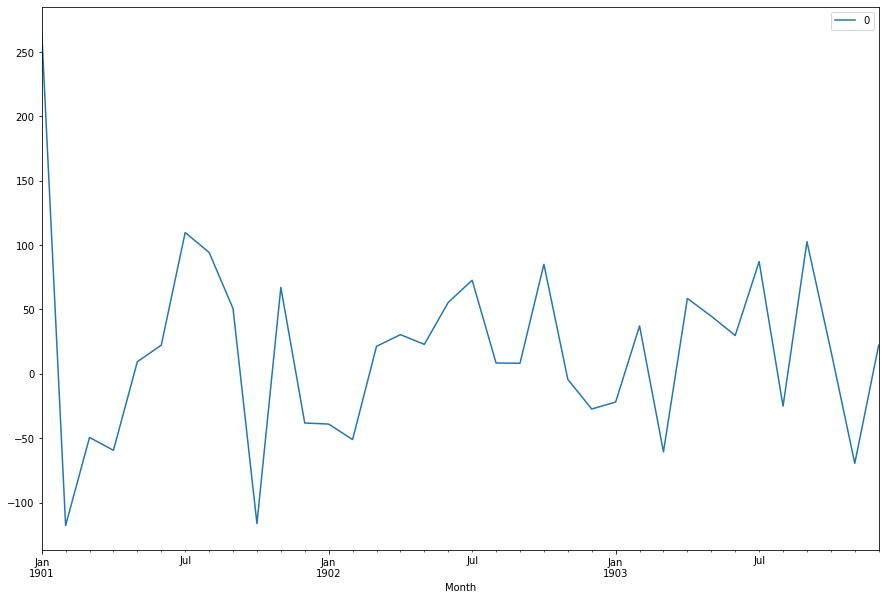

In [14]:
from pandas import DataFrame

residuals = DataFrame(model_fit.resid)
residuals.plot(figsize=(15, 10))
pyplot.show()

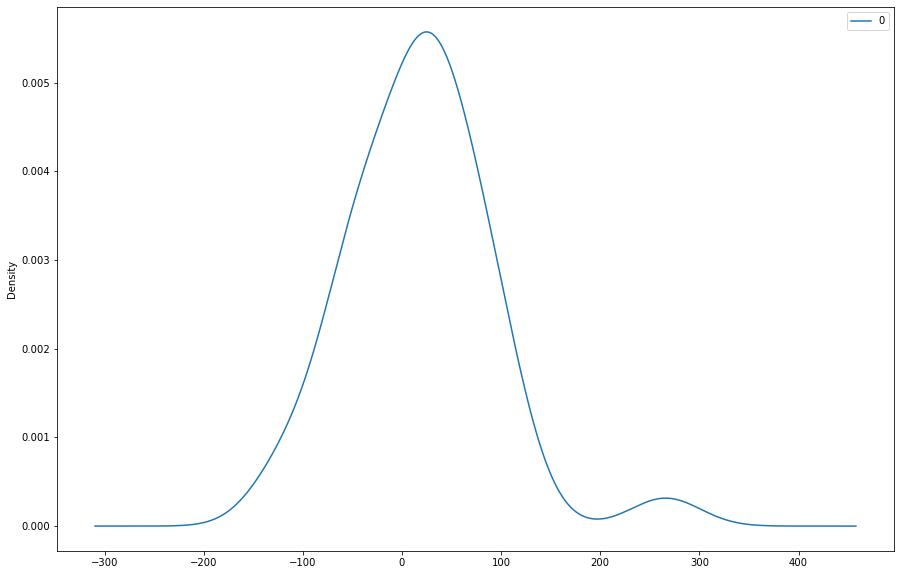

In [15]:
residuals.plot(kind='kde', figsize=(15, 10))
pyplot.show()

In [16]:
residuals.describe()

,0
count,36.000000
mean,17.910510
std,71.996089
min,-117.767506
25%,-30.039763
50%,21.791315
75%,56.231327
max,266.000000


In [33]:
X = series.values
size = int(len(X) * 0.66)

train, test = X[0:size], X[size:]

In [40]:
history = [x for x in train]
predictions = list()
for x in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output= model_fit.forecast()
    prediction = output[0]
    predictions.append(prediction)
    observation = test[x]
    history.append(observation)
    print('Predict - {}, expect - {}'.format(prediction, observation))

Predict - 343.2721804142173, expect - 342.3
Predict - 293.32967411680767, expect - 339.7
Predict - 368.6689556923214, expect - 440.4
Predict - 335.044740638034, expect - 315.9
Predict - 363.2202215171502, expect - 439.3
Predict - 357.64532347323683, expect - 401.3
Predict - 443.04783536696334, expect - 437.4
Predict - 378.3656734866571, expect - 575.5
Predict - 459.41502048414446, expect - 407.6
Predict - 526.8908755663845, expect - 682.0
Predict - 457.23127476167883, expect - 475.3
Predict - 672.9149433869607, expect - 581.3
Predict - 531.5414492158278, expect - 646.9


In [39]:
from sklearn.metrics import mean_squared_error
from math import sqrt

print(test)
print(predictions)

rmse = sqrt(mean_squared_error(test, predictions))  
print('Test RMSE - {:0.3f}'.format(rmse))

[342.3 339.7 440.4 315.9 439.3 401.3 437.4 575.5 407.6 682.  475.3 581.3
 646.9]
[320.95841250218353, 321.8219554167277, 396.7953653203765, 349.740512199778, 362.68966041960624, 310.770334383603, 455.81684493927304, 402.78845798694454, 466.37633521922226, 559.3885784183198, 461.1594036991787, 676.1714533721658, 610.3839571358926]
Test RMSE - 77.000


[342.3 339.7 440.4 315.9 439.3 401.3 437.4 575.5 407.6 682.  475.3 581.3
 646.9]


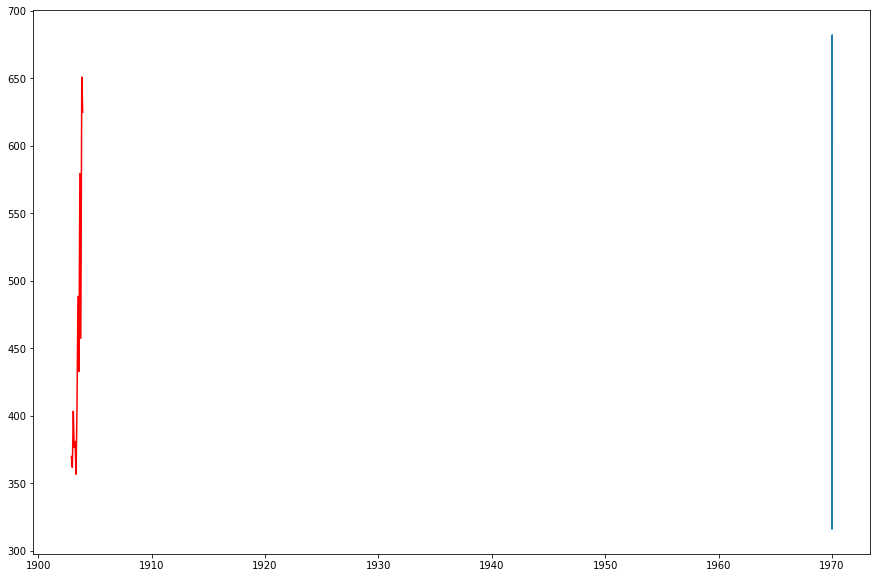

In [23]:
# plot
#print(predictions)
print(test)
pyplot.figure(figsize=(15, 10))
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()